In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_parquet("cmm_erdos_bootcamp_2020_timeseries.pq")

In [3]:
df.head()

,date_val,calendar_year,calendar_month,calendar_day,day_of_week,is_weekday,is_workday,is_holiday,volume_A,volume_B,volume_C
0,2017-01-01,2017,1,1,1,0,0,1,974,701,574
1,2017-01-02,2017,1,2,2,1,0,0,5073,2976,3149
2,2017-01-03,2017,1,3,3,1,1,0,6710,4249,3595
3,2017-01-04,2017,1,4,4,1,1,0,5746,3942,3651
4,2017-01-05,2017,1,5,5,1,1,0,5863,4279,3792


In [4]:
df_month = df.copy()
df_month['ind'] = df['calendar_year'].apply(str) 
df_month['ind'] = df_month['ind'].str.cat(df_month['calendar_month'].apply(str),sep="_")

In [5]:
df_month = df_month.drop(columns =['is_weekday','date_val','calendar_year','calendar_month','calendar_day','day_of_week','is_workday','is_holiday'])
df_month.head()

,volume_A,volume_B,volume_C,ind
0,974,701,574,2017_1
1,5073,2976,3149,2017_1
2,6710,4249,3595,2017_1
3,5746,3942,3651,2017_1
4,5863,4279,3792,2017_1


In [6]:
df_month = df_month.groupby(['ind']).sum()
df_month.describe()

,volume_A,volume_B,volume_C
count,36.000000,36.000000,36.000000
mean,188857.444444,95348.444444,89747.444444
std,28057.115083,8018.557154,8570.114656
min,135713.000000,78356.000000,74916.000000
25%,167888.250000,90394.750000,83547.750000
50%,198020.500000,95936.000000,88836.000000
75%,207928.500000,98839.250000,97885.250000
max,233097.000000,111999.000000,104071.000000


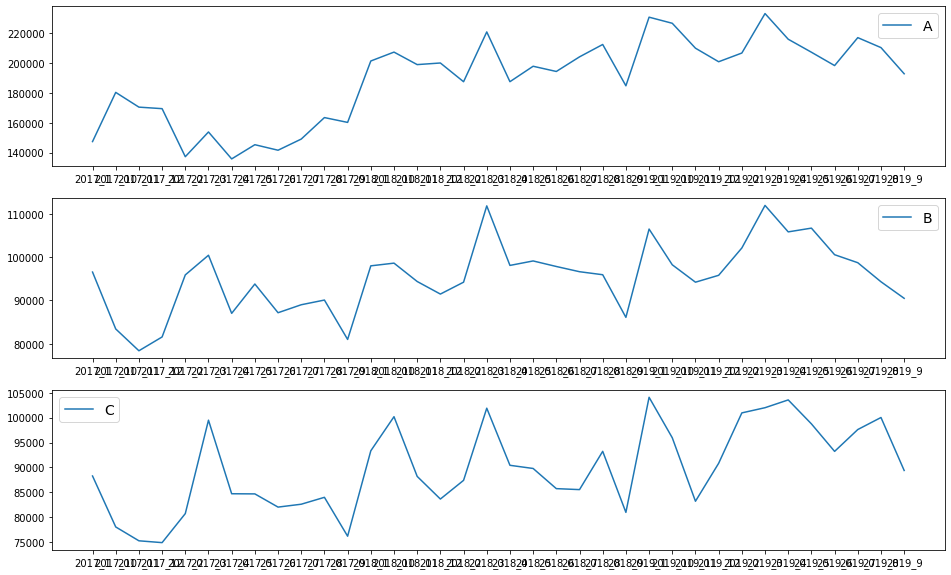

In [7]:
fig,ax = plt.subplots(3,1,figsize = (16,10))

ax[0].plot(df_month['volume_A'],label="A")
ax[1].plot(df_month['volume_B'],label="B")
ax[2].plot(df_month['volume_C'],label="C")

# Add legends
ax[0].legend(fontsize=14)
ax[1].legend(fontsize=14)
ax[2].legend(fontsize=14)

plt.show()

In [8]:
df_month.corr()

,volume_A,volume_B,volume_C
volume_A,1.000000,0.612445,0.659133
volume_B,0.612445,1.000000,0.876050
volume_C,0.659133,0.876050,1.000000


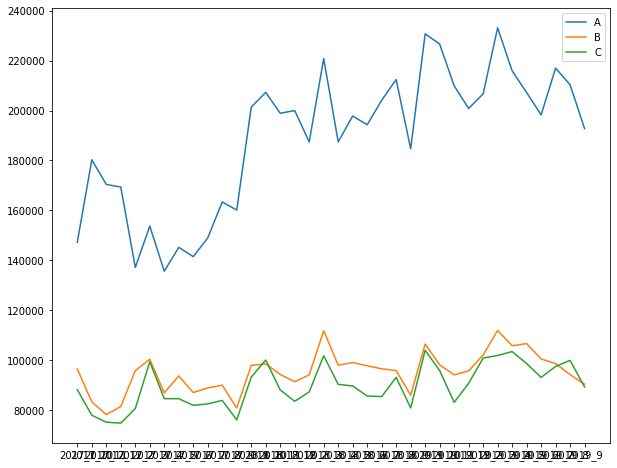

In [10]:
plt.figure(figsize=(10,8))
plt.plot(df_month['volume_A'],label="A")
plt.plot(df_month['volume_B'],label="B")
plt.plot(df_month['volume_C'],label="C")
plt.legend()